## This is my Final Project for CSPB3022

Name: Nicole Lincoln  
github: https://github.com/nikkilinx/3022_Final  
kaggle userID: nicolelincoln, display name: Nicole Lincoln  

We have been asked to participate in this Kaggle challenge as part of our Final Project.  
Our requirements are to include:
1. Brief description of the problem, data (e.g. size and dimension, structure etc)
2. Exploratory data analysis showing a few visualization, histogram, etc, and a plan of analysis. Any data cleaning procedure.
3. Model architecture and reasoning why you believe certain architecture would be suitable for this problem
4. Results (tables, figures etc) and analysis (reasoning of why or why not something worked well, also troubleshooting and hyperparameter optimization procedure summary)
5. Conclusion.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-malware-prediction/train.csv
/kaggle/input/microsoft-malware-prediction/test.csv
/kaggle/input/microsoft-malware-prediction/sample_submission.csv


## References and Resources 
* https://www.datacamp.com/community/tutorials/categorical-data
* https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib  
* https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#two
* https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

These are the kaggle notebooks I looked at
* https://www.kaggle.com/dansbecker/handling-missing-values
* https://www.kaggle.com/theoviel/load-the-totality-of-the-data
* https://www.kaggle.com/adityaecdrid/simple-feature-engineering-xd
* https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated
* https://www.kaggle.com/bogorodvo/lightgbm-baseline-model-using-sparse-matrix
* https://www.kaggle.com/cdeotte/time-series-eda-malware-0-64
* https://www.kaggle.com/prashant111/lightgbm-classifier-in-python
* https://www.kaggle.com/fabiendaniel/detecting-malwares-with-lgbm

In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import patsy
import sklearn
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import os

### The first thing I am going to do is identify the datatype of the data being uploaded, so it doesn't take up as much memory or time when loading. This is based on the notebook at https://www.kaggle.com/theoviel/load-the-totality-of-the-data, which is used in practically every other notebook I saw. 

In [5]:
# Changing the data types to gain memory when loading data; from https://www.kaggle.com/theoviel/load-the-totality-of-the-data
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

Uploading the data takes about 3 to 4 minutes for each the testing and training files. 

In [6]:
print("Importing training data")
start_time = time.time()
train = pd.read_csv('../input/microsoft-malware-prediction/train.csv', dtype=dtypes)
print("Time: %s seconds" % (time.time() - start_time))
print("The train data shape is:",train.shape)

Importing training data
Time: 224.16805005073547 seconds
The train data shape is: (8921483, 83)


In [7]:
print("Importing test data")
start_time = time.time()
test = pd.read_csv('../input/microsoft-malware-prediction/test.csv', dtype=dtypes)
print("Time: %s seconds" % (time.time() - start_time))
print("The test data shape is:",test.shape)

Importing test data
Time: 186.45067620277405 seconds
The test data shape is: (7853253, 82)


# Brief Description of the Problem and Data (e.g. size and dimension, structure etc)

The problem is to predict the probability that a machine will be hit by malware, using the properties of that machine. Microsoft has provided telemetry data from machines that have been infected and not infected. 

There are 83 different columns for the training data, and 82 for the test data. The test data does not include the HasDetections column, since that is the column that we are predicting. The shape of the training data is 8 million x 83. Although they were read in as integer or float values, and they are numerical, the vast majority of the attributes provided are categorical. 

# Data Cleaning and Exploratory Data Analysis
Since the data is so vast, with approximately 1.3 billion values between the training and the test data, data cleaning and exploration is crucial to being able to identify a working model.  

I approached data cleaning in the following order: 
1. Review columns for quick removal. I looked for columns that were too sparse (too many NA's) or too skewed (most of the data in one value). Some categories had too many unique values so I removed those. Some I was able to categorize into descrete categories or chunks, but if some I removed if there was no description explaining what the value was. Some categories are subsets of others, like the OS version and build categories. 
2. Then, I did a visual analysis of some of the remaining categories. I tried to identify any obvious differences between values. If there was an obvious difference of 'HasDetection' based on value, I kept the column; otherwise I removed it. 
3. I also aggregated or filtered some columns if there appeared to be a distinct division where the values were clustered 
4. Update missing values using either description from Microsoft, or use 0, or mean. Since the dataset is large enough, some of the columns I just left the NAs, if the percentage was below 1%. 

In [8]:
# https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated#Idea-of-training-on-all-data
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique', '% of nan', '% in the biggest cat', 'type'])

I'm only showing the top 5 rows here to save space, but I checked for categories with 90% of the values in the biggest category, or 90% misssing values. I also reviewed the categories with really large numbers of unique values to see if they were continues numerical variables, or just a lot of different categories, like an OS version or similar, that had a lot of releases. 

In [9]:
stats_df.sort_values('% in the biggest cat', ascending=False)[:5]

,Feature,Unique,% of nan,% in the biggest cat,type
5,IsBeta,2,0.000000,99.999249,int8
27,AutoSampleOptIn,2,0.000000,99.997108,int8
28,PuaMode,2,99.974119,99.974119,category
65,Census_IsPortableOperatingSystem,2,0.000000,99.945480,int8
35,Census_DeviceFamily,3,0.000000,99.838256,category


In [10]:
stats_df.sort_values('% of nan', ascending=False)[:5]

,Feature,Unique,% of nan,% in the biggest cat,type
28,PuaMode,2,99.974119,99.974119,category
41,Census_ProcessorClass,3,99.589407,99.589407,category
8,DefaultBrowsersIdentifier,2017,95.141637,95.141637,float32
68,Census_IsFlightingInternal,2,83.044030,83.044030,float16
52,Census_InternalBatteryType,78,71.046809,71.046809,category


In [11]:
stats_df.sort_values('Unique', ascending=False)[:5]

,Feature,Unique,% of nan,% in the biggest cat,type
0,MachineIdentifier,8921483,0.000000,0.000011,category
44,Census_SystemVolumeTotalCapacity,536848,0.594094,0.594094,float64
37,Census_OEMModelIdentifier,175365,1.145919,3.416271,float32
14,CityIdentifier,107366,3.647477,3.647477,float32
73,Census_FirmwareVersionIdentifier,50494,1.794915,1.794915,float32


These are the categories I've decided to simply drop. This is a pretty extensive list and drops over half of the categories. I think it's probably excessive, so if my model is not able to fit well, I will revise this list. 

In [12]:
drop_categories = ['PuaMode','Census_ProcessorClass','IsBeta', 'ProductName', 'IsSxsPassiveMode', 'HasTpm', 
                   'AutoSampleOptIn', 'UacLuaenable', 'Census_DeviceFamily', 'Census_IsPortableOperatingSystem', 
                   'Census_IsVirtualDevice','IsSxsPassiveMode','Census_IsFlightsDisabled','DefaultBrowsersIdentifier', 
                   'AVProductsEnabled','RtpStateBitfield', 'Firewall', 'OsVer','Platform','Census_IsPenCapable', 
                   'DefaultBrowsersIdentifier', 'IsProtected', 'SMode', 'Census_FlightRing', 'Census_IsAlwaysOnAlwaysConnectedCapable', 
                   'Census_HasOpticalDiskDrive', 'Census_OSArchitecture','Processor','Census_SystemVolumeTotalCapacity', 'Census_OEMModelIdentifier', 
                   'CityIdentifier', 'Census_InternalBatteryNumberOfCharges', 'AVProductStatesIdentifier', 'Census_OEMNameIdentifier',
                   'Census_ProcessorModelIdentifier','Census_InternalPrimaryDisplayResolutionHorizontal', 'DefaultBrowsersIdentifier',
                   'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalPrimaryDiagonalDisplaySizeInInches','IeVerIdentifier', 'OsBuildLab',
                   'Census_InternalBatteryType','Census_OSBuildRevision', 'Census_OSBuildNumber','Census_ChassisTypeName','Census_OSInstallLanguageIdentifier','Census_OSSkuName' ]
np.size(drop_categories)

47

In [13]:
train.drop(drop_categories, axis=1, inplace=True)
print("Training data shape:",train.shape)

test.drop(drop_categories, axis=1, inplace=True)
print("Testing data shape:",test.shape)



Training data shape: (8921483, 39)
Testing data shape: (7853253, 38)


After removing the above categories, we are left with with about 38 categorical variables. Below, I use some visualizations to make additional determinations about whether to remove additional categories, or to modify the categories that are left. 

Here are a few of the graphs I looked at to determine whether any additional categories could be removed. I looked at whether there was a difference in between the categories.
For example, if AVProductsInstalled was equal to 1.0, there was a much higher possibility of having a detection, so that category was kept in. 

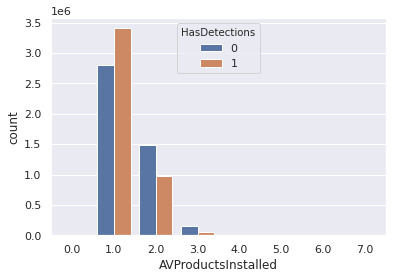

In [14]:
sns.countplot(x='AVProductsInstalled', hue='HasDetections',data=train)
plt.show()

Below, I looked at whether SmartScreen categories had any differences. 

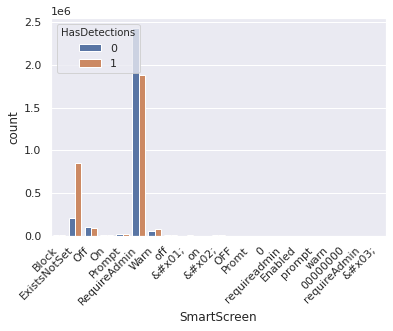

In [15]:

screen = sns.countplot(x='SmartScreen', hue='HasDetections',data=train)
screen.set_xticklabels(screen.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

SmartScreen has a lot of categories that have very few values in them,and a couple of duplicate columns. Most of the values fall within 4 Filling in SmartScreen. NA vals have been changed to ExistsNotSet and anything outside of the four main categories has been combined: 

>SmartScreen - This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. 
If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.

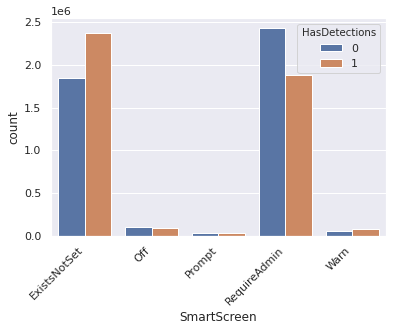

In [16]:
train.loc[train['SmartScreen'].isnull(), 'SmartScreen'] = 'ExistsNotSet'
test.loc[test['SmartScreen'].isnull(), 'SmartScreen'] = 'ExistsNotSet'
train.loc[train['SmartScreen'].isin(['RequireAdmin', 'ExistsNotSet', 'Off', 'Warn']) == False, 'SmartScreen'] = 'Prompt'
test.loc[test['SmartScreen'].isin(['RequireAdmin', 'ExistsNotSet', 'Off', 'Warn']) == False, 'SmartScreen'] = 'Prompt'

train['SmartScreen'] = train['SmartScreen'].cat.remove_unused_categories()
test['SmartScreen'] = test['SmartScreen'].cat.remove_unused_categories()

screen = sns.countplot(x='SmartScreen', hue='HasDetections',data=train)
screen.set_xticklabels(screen.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

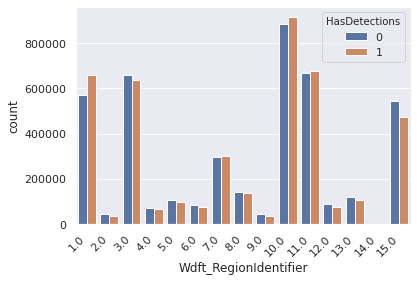

In [17]:
region = sns.countplot(x='Wdft_RegionIdentifier', hue='HasDetections',data=train)
region.set_xticklabels(region.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

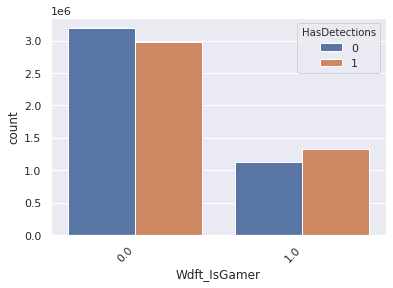

In [18]:
gamer = sns.countplot(x='Wdft_IsGamer', hue='HasDetections',data=train)
gamer.set_xticklabels(gamer.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

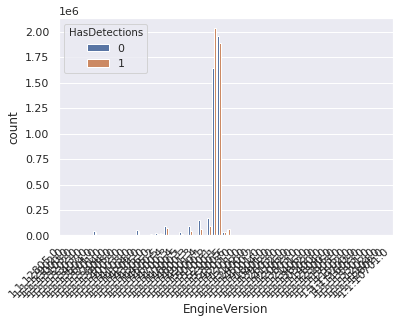

In [19]:
engine = sns.countplot(x='EngineVersion', hue='HasDetections',data=train)
engine.set_xticklabels(engine.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

EngineVersion is very difficult to read and understand in this form. Reviewing the value counts, it looks like this data can be distinguished by version number. Most values lie in the version above 1.1.15000.x, so I grouped the values by above that version or below. 

In [20]:
train.EngineVersion.value_counts()

1.1.15200.1    3845067
1.1.15100.1    3675915
1.1.15000.2     265218
1.1.14901.4     212408
1.1.14600.4     160585
                ...   
1.1.13301.0          2
1.1.12802.0          1
1.1.11202.0          1
1.1.11104.0          1
1.1.10701.0          1
Name: EngineVersion, Length: 70, dtype: int64

In [21]:
# train['AppVersion_1'] = train['AppVersion'].apply(lambda x: x.split('.')[1]).astype('category')
train['EngineVersion_2'] = train['EngineVersion'].apply(lambda x: x.split('.')[2]).astype('int16')
test['EngineVersion_2'] = test['EngineVersion'].apply(lambda x: x.split('.')[2]).astype('int16')

train['EngineVersion_group'] =  np.where(train['EngineVersion_2']>=15000, '1', '0')
test['EngineVersion_group'] =  np.where(test['EngineVersion_2']>=15000, '1', '0')
train['EngineVersion_group'] = train['EngineVersion_group'].astype('category')
test['EngineVersion_group'] = test['EngineVersion_group'].astype('category')

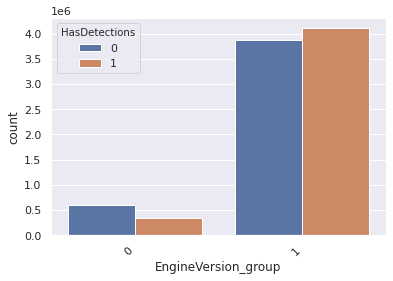

In [22]:
# EngineVersion2
region = sns.countplot(x='EngineVersion_group', hue='HasDetections',data=train)
region.set_xticklabels(region.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

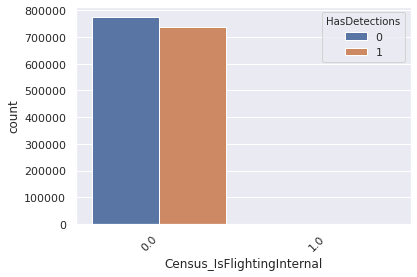

In [23]:
# Census_IsFlightingInternal
region = sns.countplot(x='Census_IsFlightingInternal', hue='HasDetections',data=train)
region.set_xticklabels(region.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

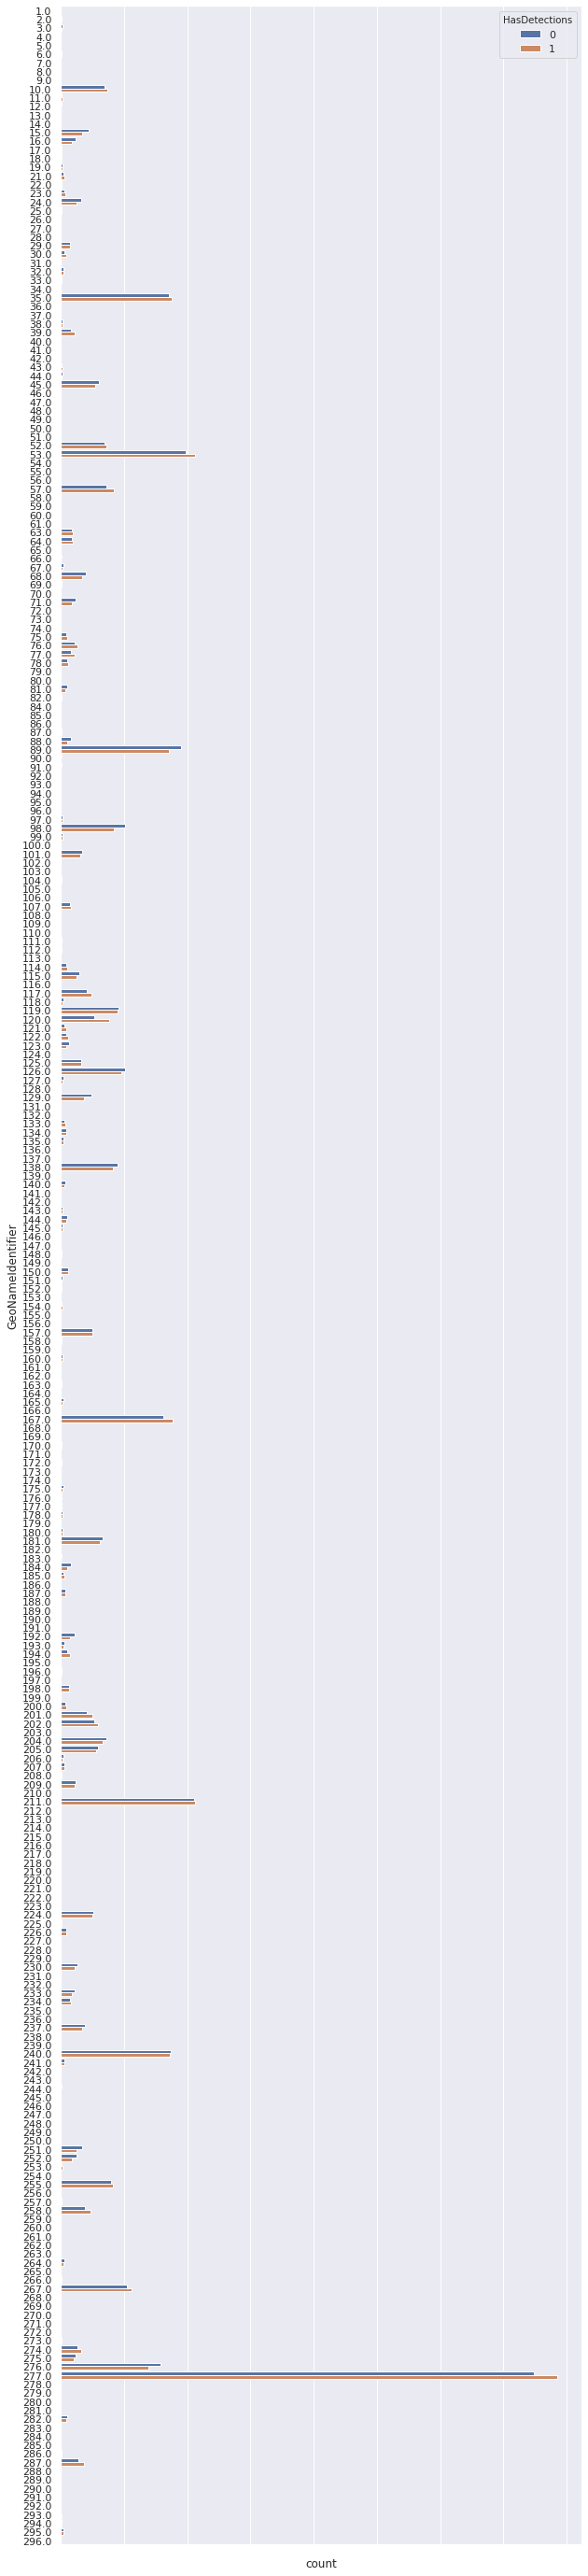

In [24]:
# GeoNameIdentifier
plt.figure(figsize=(10,50))

region = sns.countplot(y='GeoNameIdentifier', hue='HasDetections',data=train)
region.set_xticklabels(region.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


Here, I'm dropping the additional categories from my visual analysis, and the extra categories that are no longer needed from my data cleaning. Some of these categories have no description, so it's hard to know whether they are important, but it's also very challenging to decide how to deal with NAs or how to reduce categories if they are not explained. 

In [25]:
drop_categories2 = ['Census_IsFlightingInternal','Census_FirmwareVersionIdentifier','Census_FirmwareManufacturerIdentifier','EngineVersion_2','EngineVersion', 'Census_ThresholdOptIn', 
                    'Census_IsWIMBootEnabled']

train.drop(drop_categories2, axis=1, inplace=True)
print("Training data shape:",train.shape)

test.drop(drop_categories2, axis=1, inplace=True)
print("Testing data shape:",test.shape)


Training data shape: (8921483, 34)
Testing data shape: (7853253, 33)


Rerunning the stats again with the limited columns to see what needs to be updated 

In [26]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique', '% of nan', '% in the biggest cat', 'type'])


In [27]:
stats_df.sort_values('% of nan', ascending=False)[:5]

,Feature,Unique,% of nan,% in the biggest cat,type
5,OrganizationIdentifier,49,30.841487,47.037662,float16
31,Wdft_RegionIdentifier,15,3.401352,20.177195,float16
30,Wdft_IsGamer,2,3.401352,69.205344,float16
18,Census_TotalPhysicalRAM,3446,0.902686,45.894971,float32
16,Census_PrimaryDiskTotalCapacity,5735,0.594251,31.850422,float64


I still have about 34 categories left, and I need to deal with those. I'm going to first address the missing data points in the 12+ categories that still have empty values. I also still have X number of categories that have over 15 different values that I need to address. I will first change the NAN to 0, or some other value, where appropriate. I will also discretize and combine some of the variables in some of the columns to reduce the number of variables to a more management number. 

In [28]:
# OrganizationIdentifier - add 0 for nan
def add_filler(col,filler,dtype):
    train.loc[train[col].isnull(), col] = filler
    test.loc[test[col].isnull(), col] = filler
    train[col]=train[col].astype(dtype)
    test[col]=test[col].astype(dtype)

In [29]:
fill_columns = [('OrganizationIdentifier',0,'category'),('Wdft_RegionIdentifier',0,'category'),('Wdft_IsGamer',0,'category'), 
                ('Census_PrimaryDiskTotalCapacity',train['Census_PrimaryDiskTotalCapacity'].mean(),'category'),
                ('Census_TotalPhysicalRAM',train['Census_TotalPhysicalRAM'].mean(),'category'),('AVProductsInstalled',0,'category')]


for columns in fill_columns:
    add_filler(columns[0],columns[1],columns[2])

In [30]:
# train['Census_TotalPhysicalRAM'].value_counts()

train['Census_TotalPhysicalRAM_2'] = ['0' if x <4096  else '1' if (x >=4096 and x < 8192) else '2' for x in train['Census_TotalPhysicalRAM']]
test['Census_TotalPhysicalRAM_2'] = ['0' if x <4096  else '1' if (x >=4096 and x < 8192) else '2' for x in test['Census_TotalPhysicalRAM']]
train['Census_TotalPhysicalRAM_2'] = train['Census_TotalPhysicalRAM_2'].astype('category')
test['Census_TotalPhysicalRAM_2'] = test['Census_TotalPhysicalRAM_2'].astype('category')

train.drop('Census_TotalPhysicalRAM', axis=1, inplace=True)

In [31]:
# plt.plot(train['Census_PrimaryDiskTotalCapacity'])

train['Census_PrimaryDiskTotalCapacity_2'] = ['0' if x <400000 else '1' if (x >=400000 and x < 800000) else '2' for x in train['Census_PrimaryDiskTotalCapacity']]
test['Census_PrimaryDiskTotalCapacity_2'] = ['0' if x <400000 else '1' if (x >=400000 and x < 800000) else '2' for x in test['Census_PrimaryDiskTotalCapacity']]
train['Census_PrimaryDiskTotalCapacity_2'] = train['Census_PrimaryDiskTotalCapacity_2'].astype('category')
test['Census_PrimaryDiskTotalCapacity_2'] = test['Census_PrimaryDiskTotalCapacity_2'].astype('category')

train.drop('Census_PrimaryDiskTotalCapacity', axis=1, inplace=True)

Since the dataset is really large, I am creating a smaller training and test set to work with, before trying code with the full set. I have created a test set from the training data, simply for the purpose of being able to find the score and confusion matrices, like we have done in class. 

In [32]:
train_small = train[::100]

#Test from Train
tft = train[::101]

(89215, 34)
(88332, 34)


# Model Fitting 

Below, I try fitting multiple models to see which gives the best accuracy. First, I had created both a small training set and a small test set from the original training data. I created my testing set from the original training data, so that I could verify the accuracy of my models. 

I tried logistic regression, LDA and KNN. I expected logistic regression to perform better than LDA, since I didn't see anything in my EDA that suggested the parameters were normally distributed. I tried scaling the data as well to see if that would make LDA perform any better, and it did not change the accuracy of either the LDA or the LR models. 

I picked parameters for the model based on a few of the graphs above, where it looked like there might be some differences between HasDetection and not, and also by looking at some of the other Kaggle results that had graphs showing predictor importance. I tried many different combinations of the predictors, and ultimately settled on the 6 below, since the accuracy scores were not changing much. Obvsiously, this is not the most ideal way to choose the features. However, we haven't had a lot of experience with choosing predictors when there are this many predictors available. Ideally, I would have been able to do either a forward or backward stepwise selection of the features, but I found patsy to be extremely difficult to work with to try any kind of best subset selection or stepwise selection

Things I tried that you can't see in the final product: 
Changing solvers, multi_class, max_iter. None of these changes provided any measurable difference in the accuracy of the model, and I continued to get a "model did not converge" error, even after scaling and making additional changes, so I ultimately just stuck with the default parameters. 

In [77]:
#FORMAT SMALL DATA

smtrain_y,smtrainX = patsy.dmatrices("C(HasDetections,[[0],[1]]) ~ 0 + Census_IsTouchEnabled + AVProductsInstalled + SmartScreen+ EngineVersion_group + OsSuite + Census_OSInstallTypeName", data=train_small)
smtest_y, smtestX = patsy.dmatrices("C(HasDetections,[[0],[1]]) ~ 0 + Census_IsTouchEnabled + AVProductsInstalled + SmartScreen+ EngineVersion_group + OsSuite + Census_OSInstallTypeName", data=tft) 


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(smtrainX)
scaler.fit_transform(smtestX);

Confusion Matrix:
 [[21966 14159]
 [22293 29914]]
Test score is 0.5873296200697369


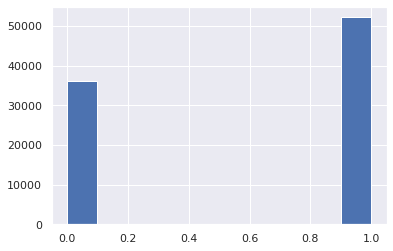

In [76]:
lr = sklearn.linear_model.LogisticRegression()
# FIT
model = lr.fit(smtrainX,smtrain_y.ravel())

#PREDICT
yhat = model.predict(smtestX)

#Confusion Matrix
cm = sklearn.metrics.confusion_matrix(yhat, smtest_y)
print('Confusion Matrix:\n',cm)

#Accuracy 
print('Test score is', model.score(smtestX, smtest_y.ravel()))
# proba = model.predict_proba(smtestX)[:,1]
plt.hist(yhat);

I ran KNN multiples times as a loop with k = 1,2,3,4,5. Althought the best k varied, k = 4 was the one that consistently came out on top. I have removed the loop in order to save time and memory on subsequent runs, since my kernel kept crashing.

Test score is 0.5496535796766744


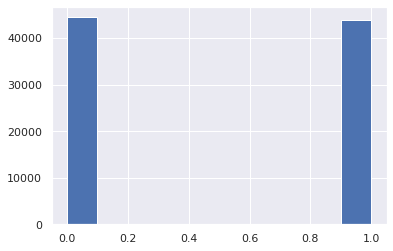

In [36]:
#KNN

# recalls = []
# ks = [1,2,3,4,5]
# for k in ks:
#     neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k)
#     neigh_model = neigh.fit(smtrainX,smtrain_y.ravel())
#     knn_hat = neigh_model.predict(smtestX)
#     accuracy = neigh_model.score(smtestX, smtest_y.ravel())
#     recalls.append(accuracy)
# plt.plot(ks, recalls)
# print(recalls)

k = 4
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k)
neigh_model = neigh.fit(smtrainX,smtrain_y.ravel())
knn_hat = neigh_model.predict(smtestX)
print('Test score is', neigh_model.score(smtestX, smtest_y.ravel()))
plt.hist(knn_hat);

Confusion Matrix:
 [[22006 14267]
 [22253 29806]]
Test score is 0.5865597971290133


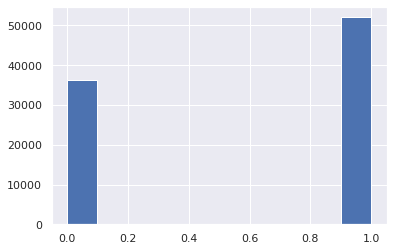

In [37]:
#LDA  
lda = LinearDiscriminantAnalysis()

# FIT
lda_model = lda.fit(smtrainX,smtrain_y.ravel())

#PREDICT
lda_yhat = lda_model.predict(smtestX)

#Confusion Matrix
lda_cm = sklearn.metrics.confusion_matrix(lda_yhat, smtest_y)
print('Confusion Matrix:\n',lda_cm)

#Accuracy 
print('Test score is', lda_model.score(smtestX, smtest_y.ravel()))
# proba = lda_model.predict_proba(smtestX)[:,1]
plt.hist(lda_yhat);

# Conclusion
|Model|Score|
|:--:|:--:|
|Logistic| 0.58733|
|KNN(4)|0.54965|
|LDA|0.58656|

 

The table above shows the scores of each of my models. They are all very close, and honestly, they are all pretty low for this dataset. I assume some of the issue is with the way that I've cleaned the data set, since I've eliminated a significant number of columns that were likely important. As I mentioned above, we haven't done a whole lot with EDA, so trying to do this with 83 categories was like trying to swim the English channel after being taught how to swim in a kiddie pool. 

I printed the confusion matrices for each model above. For this run, there are more false negatives than false positives. The bar charts also shows that the results are skewed towards having detection, even though they were evenly split between having detection and does not have detection for the training data set.   

I really expected the Logistic regression to outperform LDA since the features don't have a normal distribution. I was also a little surprised that the KNN did worst of all. I tried multiple different n values for KNN, and k = 4 provided the best accuracy with my testing data, while minimizing complexity. This did change on consecutive runs, with the best k value varying from 3, 4 or 5. However, the score is still the worst of all 3 models. 

Since LDA scored marginally higher than logistic regression, I am going to use LDA on the full training and testing data, and use that as my submission to the contest. I scored a 0.58687 on my submission. 

Also, below the LDA with the full data, is my attempt at running the LGBMClassifier. This seemed to be the classifier that most of the people participating in the competition used. This was a completely new classifier, and I only have a tenuous grasp on what exactly it is doing. I also ran it without changing any of the basic parameters. Again, this is a new classifier, so I don't know enough to manipulate the parameters without just guessing.  

(As a final sidenote, I really enjoyed participating in this competition. It was really hard and really confusing at times, but ultimately, I learned a lot. I felt like I could have spent weeks just doing the EDA and data cleaning, but I really enjoyed seeing how other people do it, and seeing how people use visualizations to analyze the data, before even attempting to pick a model.)


In [70]:
#Large Data
all_avt = sorted(train["AVProductsInstalled"].unique())
train_y,trainX = patsy.dmatrices("C(HasDetections,[[0],[1]]) ~ 0 + Census_IsTouchEnabled + C(AVProductsInstalled,levels = all_avt) + SmartScreen+ EngineVersion_group + OsSuite + Census_OSInstallTypeName", data=train)
testX = patsy.dmatrix("0 + Census_IsTouchEnabled + C(AVProductsInstalled,levels = all_avt) + SmartScreen+ EngineVersion_group + OsSuite + Census_OSInstallTypeName", data=test) 


In [73]:
#LDA with full data

# FIT
lda_model_full = lda.fit(trainX,train_y.ravel())

#PREDICT
lda_yhat = lda_model_full.predict(testX)

large_proba = lda_model_full.predict_proba(testX)[:,1]


In [75]:
machine = test['MachineIdentifier']

joined = list(zip(machine,large_proba))
sub = pd.DataFrame(joined, columns = ['MachineIdentifier', 'HasDetections'])
# sub.to_csv('submission.csv', index=False)
sub.head()


,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,0.566338
1,00000176ac758d54827acd545b6315a5,0.551574
2,0000019dcefc128c2d4387c1273dae1d,0.344704
3,0000055553dc51b1295785415f1a224d,0.371290
4,00000574cefffeca83ec8adf9285b2bf,0.540949


### My attempt at running LGBMClassifier

In [78]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
y = train['HasDetections']
machine = test['MachineIdentifier']
train.drop('HasDetections', axis=1, inplace=True)
test.drop('MachineIdentifier', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

#LGBM without changing any of the parameters 
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train.ravel())

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.6362
